In [1]:
from car_detector import get_output_layers, extract_car
from dataset_extractor import download_dataset, annotations_formatting, cropping_organizing_directory
from filtering import apply_filter, create_filtered_dataset
from classifier import create_data, launch_training, predict_emission
import numpy as np
import pandas as pd
import PIL
import os
import shutil
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
from collections import Counter
import os
from urllib.request import urlretrieve
import tarfile
from scipy.io import loadmat
import shutil

In [2]:
#INSERT : GLOBAL DIRECTORY
global_dir = "/home/jovyan/my_work/data/End-to-end model/"
#INSERT : PATH WITH IMAGES TO PREDICT
dataset_predicted_folder = "/home/jovyan/activities_data/hi__paris_2022_hackathon/final_challenge/datasets/datasets_test/test/"
#INSERT : PATH WITH PROVIDED TRAIN/TEST SETS
original_dataset = "/home/jovyan/activities_data/hi__paris_2022_hackathon/final_challenge/datasets/datasets_train/"

### Prediction visualization.

In [16]:
csv_pred = 'team10.csv'
df_pred = pd.read_csv(csv_pred, sep=';')

Visualization of cars identifed.

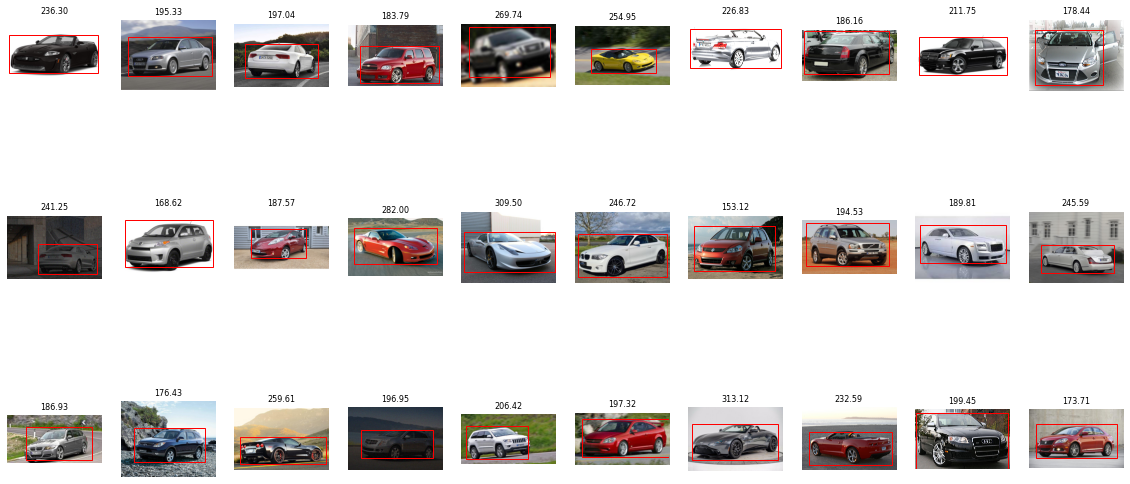

In [8]:
# cars only
df_cars = df_pred[df_pred['class']=='car'].copy().reset_index(drop=True)
nb = 30
off_set = 100
plt.figure(figsize=(20,10))
for i in range(nb):
    file = df_cars.at[off_set + i, 'im_name']
    x_min = df_cars.at[off_set + i, 'x_min']
    y_min = df_cars.at[off_set + i, 'y_min']
    
    x_max = df_cars.at[off_set + i, 'x_max']
    y_max = df_cars.at[off_set + i, 'y_max']
    emission = df_cars.at[off_set + i, 'emission']
    ax = plt.subplot(3, 10, i+1)
    im_path = dataset_predicted_folder + file
    img = np.asanyarray(Image.open(im_path))
    ax.imshow(img)

    rect = patches.Rectangle(
        (x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor="r", facecolor="none")

    ax.add_patch(rect)
    ax.axis(False)
    ax.set_title('{:.2f}'.format(emission), fontsize=8)
plt.show()

Visualization of all results.

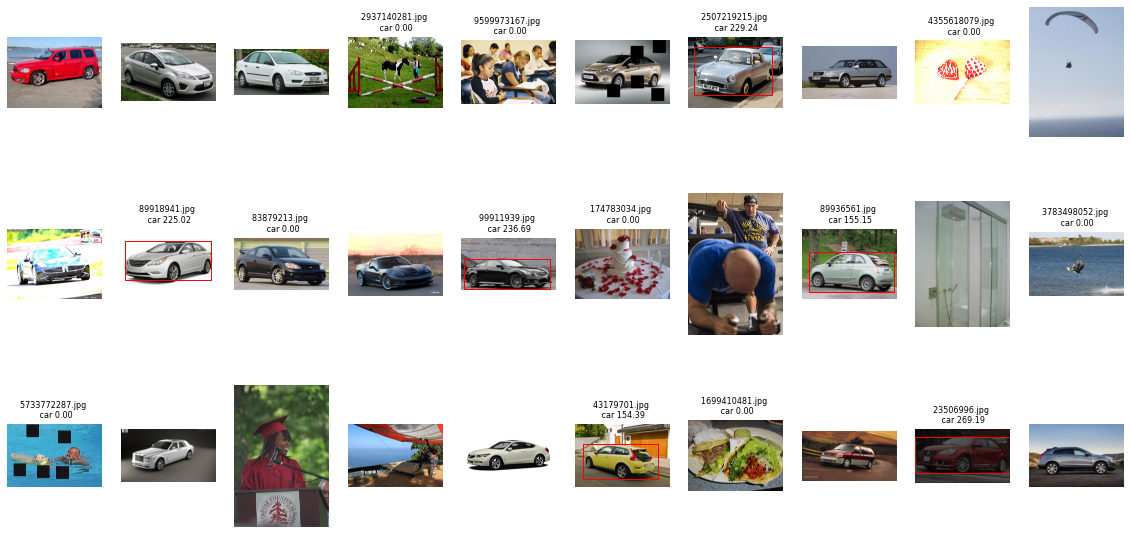

In [9]:
nb = 30
off_set = 100
plt.figure(figsize=(20,10))
for i in range(nb):
    file = df_pred.at[off_set + i, 'im_name']
    x_min = df_pred.at[off_set + i, 'x_min']
    y_min = df_pred.at[off_set + i, 'y_min']
    
    x_max = df_pred.at[off_set + i, 'x_max']
    y_max = df_pred.at[off_set + i, 'y_max']
    emission = df_pred.at[off_set + i, 'emission']
    cat = df_pred.at[i, 'class']
    
    ax = plt.subplot(3, 10, i+1)
    im_path = dataset_predicted_folder + file
    img = np.asanyarray(Image.open(im_path))
    ax.imshow(img)
    if cat == 'car':
        rect = patches.Rectangle(
            (x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor="r", facecolor="none")

        ax.add_patch(rect)
        ax.set_title('{} \n car {:.2f}'.format(file, emission), fontsize=8)
    ax.axis(False)
    
plt.show()

Visualization of images in which no cars have been detected.

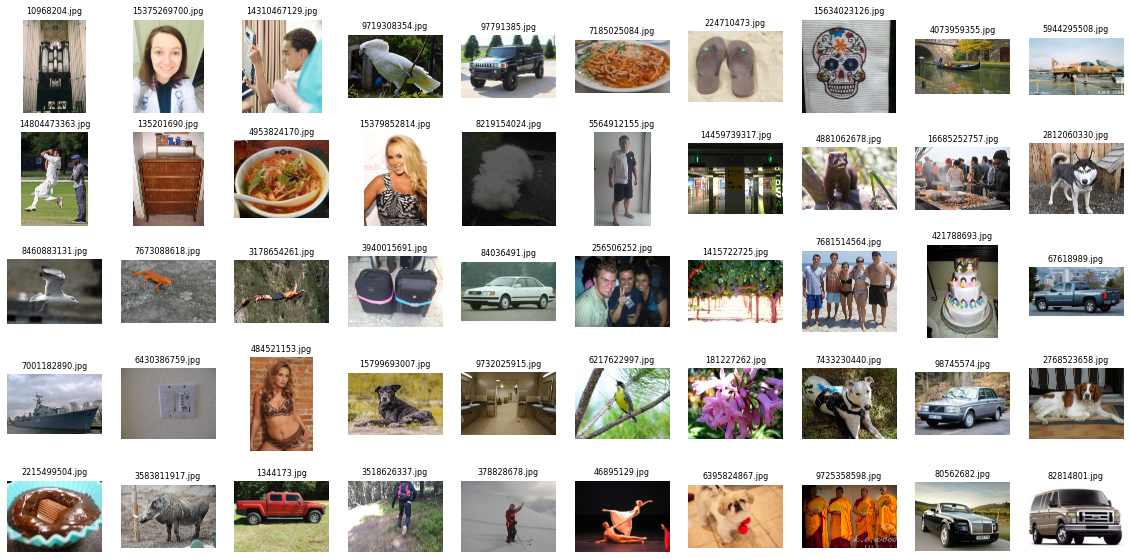

In [15]:
# no cars only
df_nocars = df_pred[df_pred['class']!='car'].copy().reset_index(drop=True)
nb = 50
off_set = 100
plt.figure(figsize=(20,10))
for i in range(nb):
    file = df_nocars.at[off_set + i, 'im_name']
    ax = plt.subplot(5, 10, i+1)
    im_path = dataset_predicted_folder + file
    img = np.asanyarray(Image.open(im_path))
    ax.imshow(img)
    ax.axis(False)
    ax.set_title('{}'.format(file), fontsize=8)
plt.show()